# Lesson 09 - Workalong 2, Step 1
This notebook develops and tests the code for a function that generates a plot of some interesting weather.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cmocean
import os

In [2]:
""" Read the dataset """
# set the path to the input data file
input_file = "/N/project/obrienta_startup/datasets/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc"

# set the directory where we'll save the images
out_path = "/N/slate/ruhchai/G690/09_parallelization_intro/frames/"

# set the timestep to plot
timestep = 0

# make sure the output directory exists
if not os.path.exists(out_path):
    ! curl --output {out_path} {url}

# load the data file
precip_water_ds = xr.open_dataset(input_file, chunks = -1)
print(type(precip_water_ds))
precip_water_ds

<class 'xarray.core.dataset.Dataset'>


<xarray.Dataset>
Dimensions:    (time: 720, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2021-06-01 ... 2021-06-30T23:00:00
Data variables:
    TCW        (time, latitude, longitude) float32 dask.array<chunksize=(720, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r4i1n35 4.12.14-95.51-default #1 SMP Fri Apr ...
    CONVERSION_DATE:      Fri Sep  3 11:04:41 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Sep  3 11:04:57 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

In [3]:
# pull out the latitudes and longitudes
lat = precip_water_ds.latitude
lon = precip_water_ds.longitude

In [4]:
# plot the variable on an orthographic projection centered on
# Bloomington, IN
Bloomington_lon = -86.526386
Bloomington_lat = 39.165325

projection = cartopy.crs.Orthographic(central_longitude=Bloomington_lon, central_latitude=Bloomington_lat)
transform = cartopy.crs.PlateCarree()

<class 'numpy.ndarray'>
<class 'numpy.datetime64'>


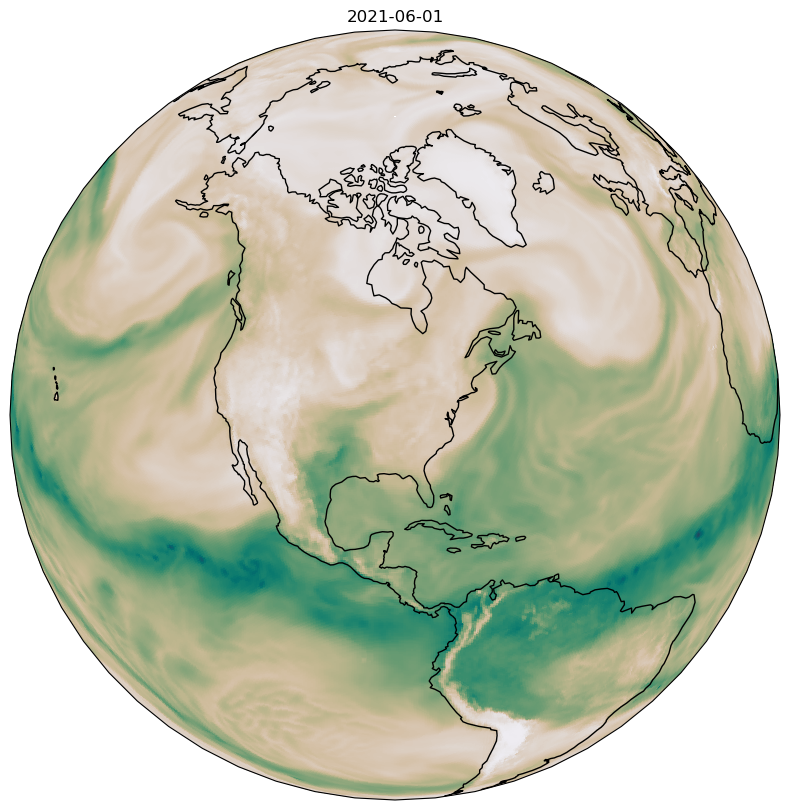

In [5]:
# color map
cmap = cmocean.cm.rain

# create a plot with projection
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=(dict(projection=projection)))

# get the variable at the requested timestep
tcw_np = precip_water_ds['TCW'][timestep].values
print(type(tcw_np))

cplt = ax.pcolormesh(
        lon,
        lat,
        tcw_np,
        cmap = cmap,
        #vmin = -30,
        #vmax = 50,
        transform = transform,
        )

# get the time of the timestep
time = precip_water_ds['time'][timestep].values
print(type(time))
# convert it to a datetime object

# add a title with a nicely formatted date
ax.set_title(str(pd.to_datetime(time).date()), fontsize=12)
# add coastlines
ax.coastlines()

# plot
ax.set_global()
plt.show()

In [8]:
""" Make a function to plot and save the data at a given timestep. """

def generate_frame(
        i : int,
        input_file = "/N/project/obrienta_startup/datasets/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc",
        output_dir = "./frames/"):

        # make sure the path exists
        if not os.path.exists(output_dir):
            ! curl --output {output_dir} {url}
        
        # load the data file
        precip_water_ds = xr.open_dataset(input_file, chunks = -1)
        lat = precip_water_ds.latitude
        lon = precip_water_ds.longitude

        # set up the orthographic projection centered on Bloomington, IN
        Bloomington_lon = -86.526386
        Bloomington_lat = 39.165325
        projection = cartopy.crs.Orthographic(central_longitude=Bloomington_lon, central_latitude=Bloomington_lat)
        transform = cartopy.crs.PlateCarree()

        # choose the color map
        cmap = cmocean.cm.rain
        
        # get the variable at the requested timestep
        tcw_np = precip_water_ds['TCW'][timestep].values

        # plot the data
        fig, ax = plt.subplots(figsize=(10,10), subplot_kw=(dict(projection=projection)))
        cplt = ax.pcolormesh(lon, lat, tcw_np, cmap=cmap, transform=transform)
        # add the color bar
        fig.colorbar(cplt, ax=ax, label="Precipitable Water [mm]")
        
        # get the datetime of the timestep
        time = pd.to_datetime(precip_water_ds['time'][timestep].values)
        date = time.date()
        # add a title with a nicely formatted date
        ax.set_title(str(date), fontsize=20)
        
        # add coastlines
        ax.coastlines()
        ax.set_global()

        output_file = "output_dir" + str(date) + ".png"
        # save the fig
        plt.savefig(output_file, dpi=300)

        plt.close()

In [10]:
""" Test the function. """
out_path= "./frames/"
# set the timestep to plot (select a new timestep)
timestep = 0
# generate the plot
generate_frame(i=timestep, output_dir=out_path)